# El modelo de **Izhikevich**

In [66]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

import ode

## RK4 para el modelo

In [67]:
def f(x,t,p):
    """
    x[0] = v(t)
    x[1] = u(t)
    p[0] = g
    p[1] = q
    p[2] = w
    p[3] = a
    p[4] = b
    p[5] = c
    p[6] = d
    p[7] = I
    """
    g = p[0]
    q = p[1]
    w = p[2]
    a = p[3]
    b = p[4]
    c = p[5]
    d = p[6]
    s = p[7]
    I = p[8]
    v = x[0]
    u = x[1]
    return np.array([
      g*v*v + q*v + w - u + I(t),
      a*(b*v-u)
    ])

In [68]:
g = 0.04
q = 5
w = 140
a = 0.02
b = 0.2
c = -65
d = 2
s = 30
def I(t):
    t0 = 50
    if t<t0:
        return 0
    return 10
p = [g,q,w,a,b,c,d,s,I]

In [69]:
def cond(x,t,p):
    #g = p[0]
    #q = p[1]
    #w = p[2]
    #a = p[3]
    #b = p[4]
    c = p[5]
    d = p[6]
    s = p[7]
    #I = p[8]
    v = x[0]
    u = x[1]
    if x[0] >= s:
        return np.array([c,u+d])
    return x

In [70]:
v0 = -70
u0 = b*v0
x0 = np.array([v0,u0])
t0 = 0
t1 = 200
h = 0.01
k = int((t1-t0)/h) + 1

In [71]:
t,x = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

In [72]:
# Definimos las corrientes I1, I2, I3, I4

def I_1(t):
    t0 = 25
    if t<t0:
        return 0
    return 10

def I_2(t):
    t0 = 150
    if t<t0:
        return 0
    return 2.5

def I_3(t):
    t0 = 100
    if t<t0:
        return -15
    return 0

def I_4(t):
    t0 = 10
    t1 = 100
    t2 = t1 + 5
    I0 = 0
    I1 = .165
    I2 = 10
    if t<t0:
        return I0
    elif t>=t0 and t<t1:
        return I1      
    elif t>=t1 and t<t2:
        return I2     
    else:
        return I1

## Los 8 tipos de neuronas (figura 2 del paper)

In [71]:
# Regular Spiking (RS)
a = 0.02
b = 0.2
c = -65
d = 8
v0 = -70
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_1]
t,x1 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Intrinsically Bursting (IB)
a = 0.02
b = 0.2
c = -55
d = 4
v0 = -70
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_1]
t,x2 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Chattering (CH)
a = 0.02
b = 0.2
c = -50
d = 2
v0 = -70
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_1]
t,x3 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Fast Spiking (FS)
a = 0.1
b = 0.2
c = -65
d = 2
v0 = -70
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_1]
t,x4 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Thalamo-Cortical (TC1)
a = 0.02
b = 0.25
c = -65
d = 0.05
v0 = -63
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_2]
t,x5 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Thalamo-Cortical (TC2)
a = 0.02
b = 0.25
c = -65
d = 0.05
v0 = -63
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_3]
t,x6 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Resonator (RZ)
a = 0.1
b = 0.26
c = -65
d = 2
v0 = -62.5
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_4]
t,x7 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

# Low Threshold Spiking (LTS)
a = 0.02
b = 0.25
c = -65
d = 2
v0 = -64.4
u0 = b*v0
x0 = np.array([v0,u0])
p = [g,q,w,a,b,c,d,s,I_1]
t,x8 = ode.integrador_ode(ode.rk4,f,x0,t0,t1,k,p,c=cond)

In [72]:
vs = np.vstack((t, x1, x2, x3, x4, x5, x6, x7, x8))
vs.shape

(17, 20002)

In [150]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

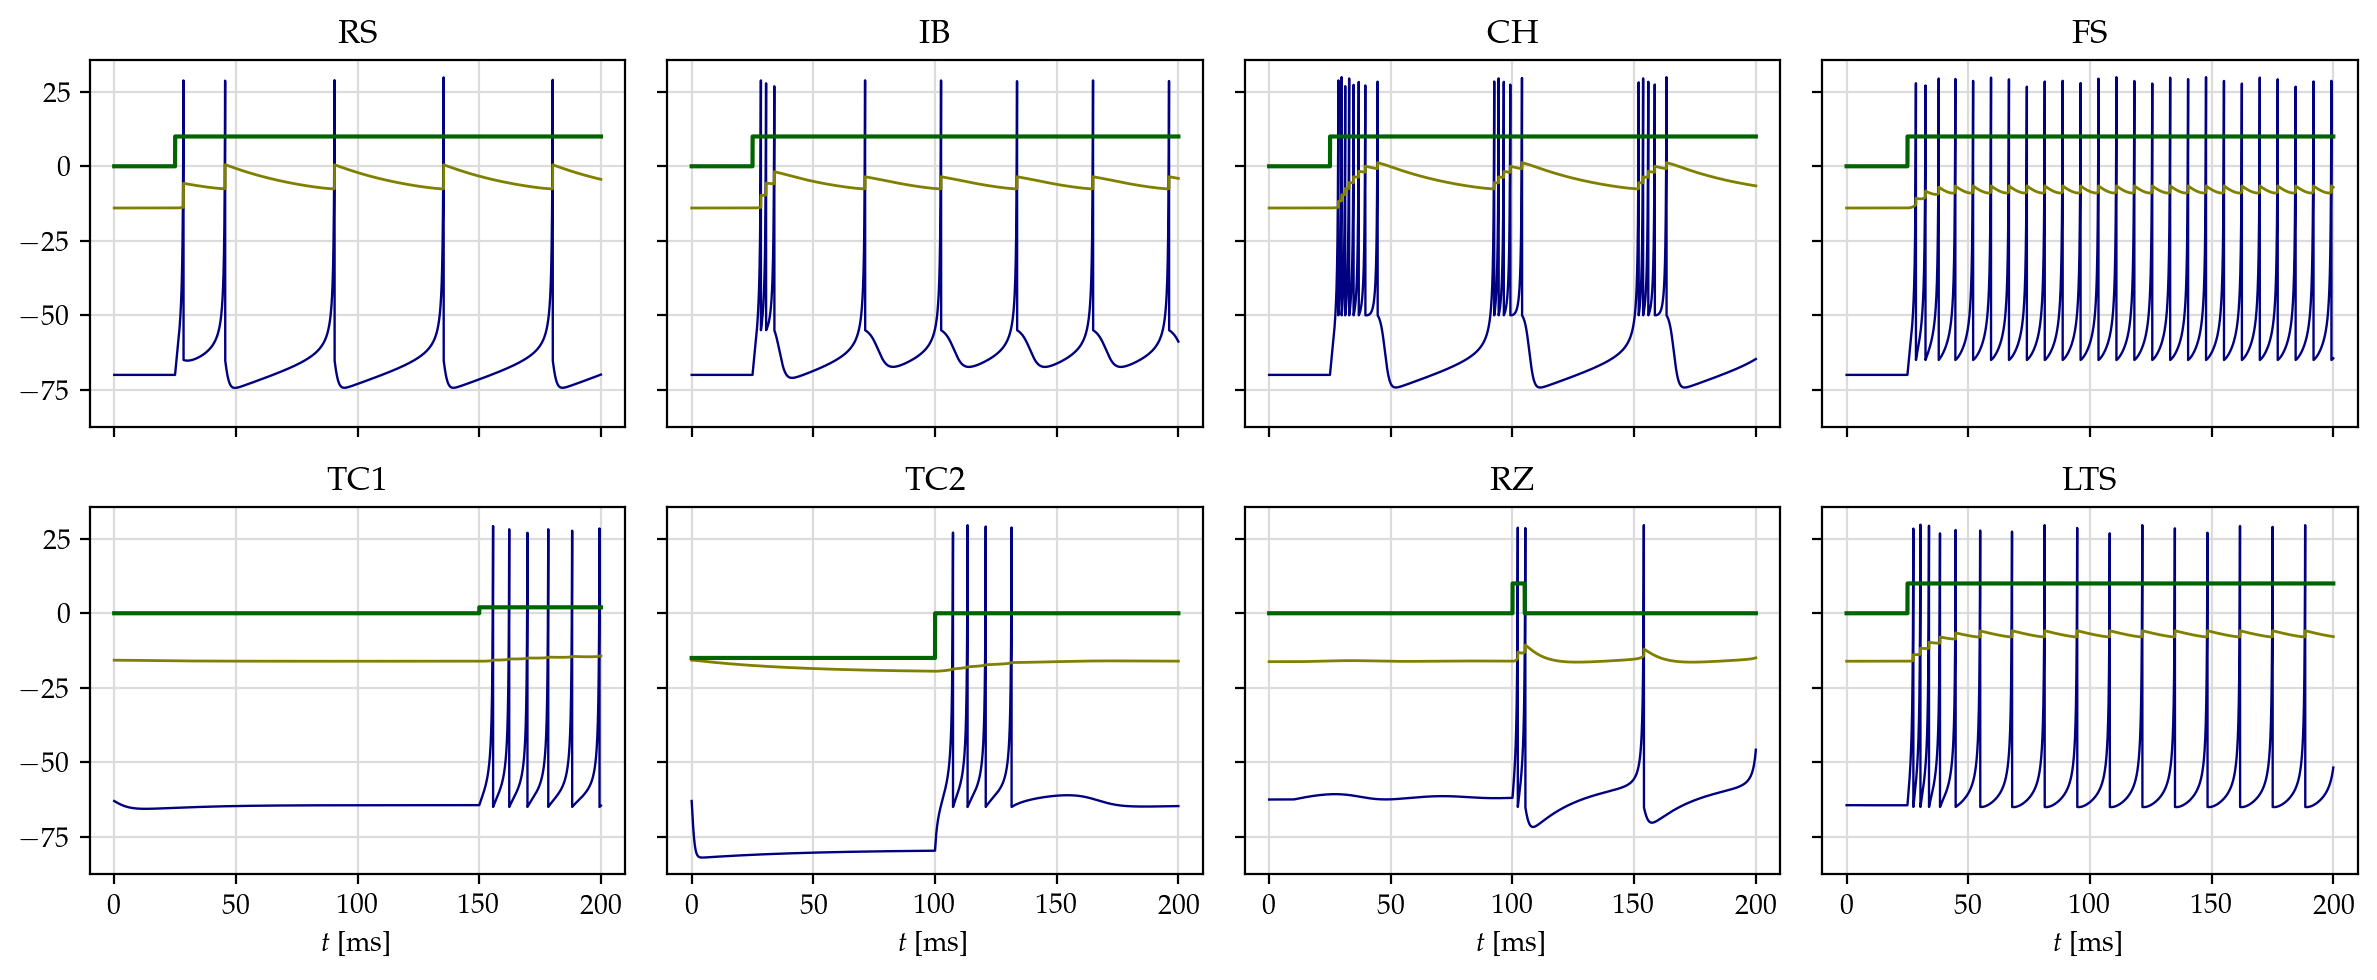

In [75]:
x = vs[0]
fig, axs = plt.subplots(2, 4, figsize=(12,5), sharex=True, sharey=True)
nombres = ["RS", "IB", "CH", "FS", "TC1", "TC2", "RZ", "LTS"]

for i in range(0,4):
    v = vs[2*i+1] 
    u = vs[2*i+2]
    axs[0, i].plot(x,v,linestyle='-',c='navy',linewidth=0.85)
    axs[0, i].plot(x,u,linestyle='-',c='olive',linewidth=1.0)
    axs[0, i].plot(x,np.vectorize(I_1)(x),linestyle='-',c='darkgreen')
    axs[0, i].set_title(nombres[i])
    axs[0, i].grid(color='gainsboro')

for i in range(4,8):
    v = vs[2*i+1] 
    u = vs[2*i+2]
    axs[1, i-4].plot(x,v,linestyle='-',c='navy',linewidth=0.85)
    axs[1, i-4].plot(x,u,linestyle='-',c='olive',linewidth=1.0)
    axs[1, i-4].set_title(nombres[i])
    axs[1, i-4].grid(color='gainsboro')
    axs[1, i-4].set_xlabel("$t$ [ms]")

axs[1, 0].plot(x,np.vectorize(I_2)(x),linestyle='-',c='darkgreen')
axs[1, 1].plot(x,np.vectorize(I_3)(x),linestyle='-',c='darkgreen')
axs[1, 2].plot(x,np.vectorize(I_4)(x),linestyle='-',c='darkgreen')
axs[1, 3].plot(x,np.vectorize(I_1)(x),linestyle='-',c='darkgreen')

fig.tight_layout()

plt.savefig('figura-2.pdf', dpi=600, format='pdf')

## Red neuronal de Izhikevich (figura 3 del paper)

In [146]:
ne=800 # numero de neuronas exitatorias.
ni=200 # numero de neuronas inhibitorias.
n=ne+ni
re=np.random.random(size=ne)
ri=np.random.random(size=ni)
a=np.ones(n)        
a[:ne]*=0.02         
a[ne:]=0.02+0.08*ri[:]
b=np.ones(n)
b[:ne]*=0.2
b[ne:]=0.25-0.05*ri[:]
c=-65*np.ones(n)
c[:ne]+=15*np.square(re)
d=np.ones(n)
d[:ne]=8-6*np.square(re)
d[ne:]*=2

s=np.random.random(size=(n,n))
s[:,:ne]*=0.5 
s[:,ne:]*=-1 
# condicion inicial
v=-65*np.ones(n)
u=b*v
firings=[]

list_t = []    # inicializamos una lista para poner todos los t
list_ve = []   # idem con los v de las neuronas excitatorias
list_vi = []   # y tambien los v de las neuronas inhibitorias

# loop temporal
for t in range(1000):
    
    list_t.append(t)   # que me guarde todos los t en una lista
    
    I=np.random.normal(size=n)
    I[:ne]*=5
    I[ne:]*=2
    fired=v>=30
    for i in np.where(fired)[0]:
        firings.append([t,i])
    v[fired]=c[fired]
    u[fired]+=d[fired]
    I+=np.sum(s[:,fired],1) 
    v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)  
    v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)   
    u=u+a*(b*v-u)                         

    list_ve.append(v[0])     # que me guarde el v de la primera neurona (aca estoy con las excitatorias)
    list_vi.append(v[800])   # y el v de la neurona 801 (que es una inhibitoria)

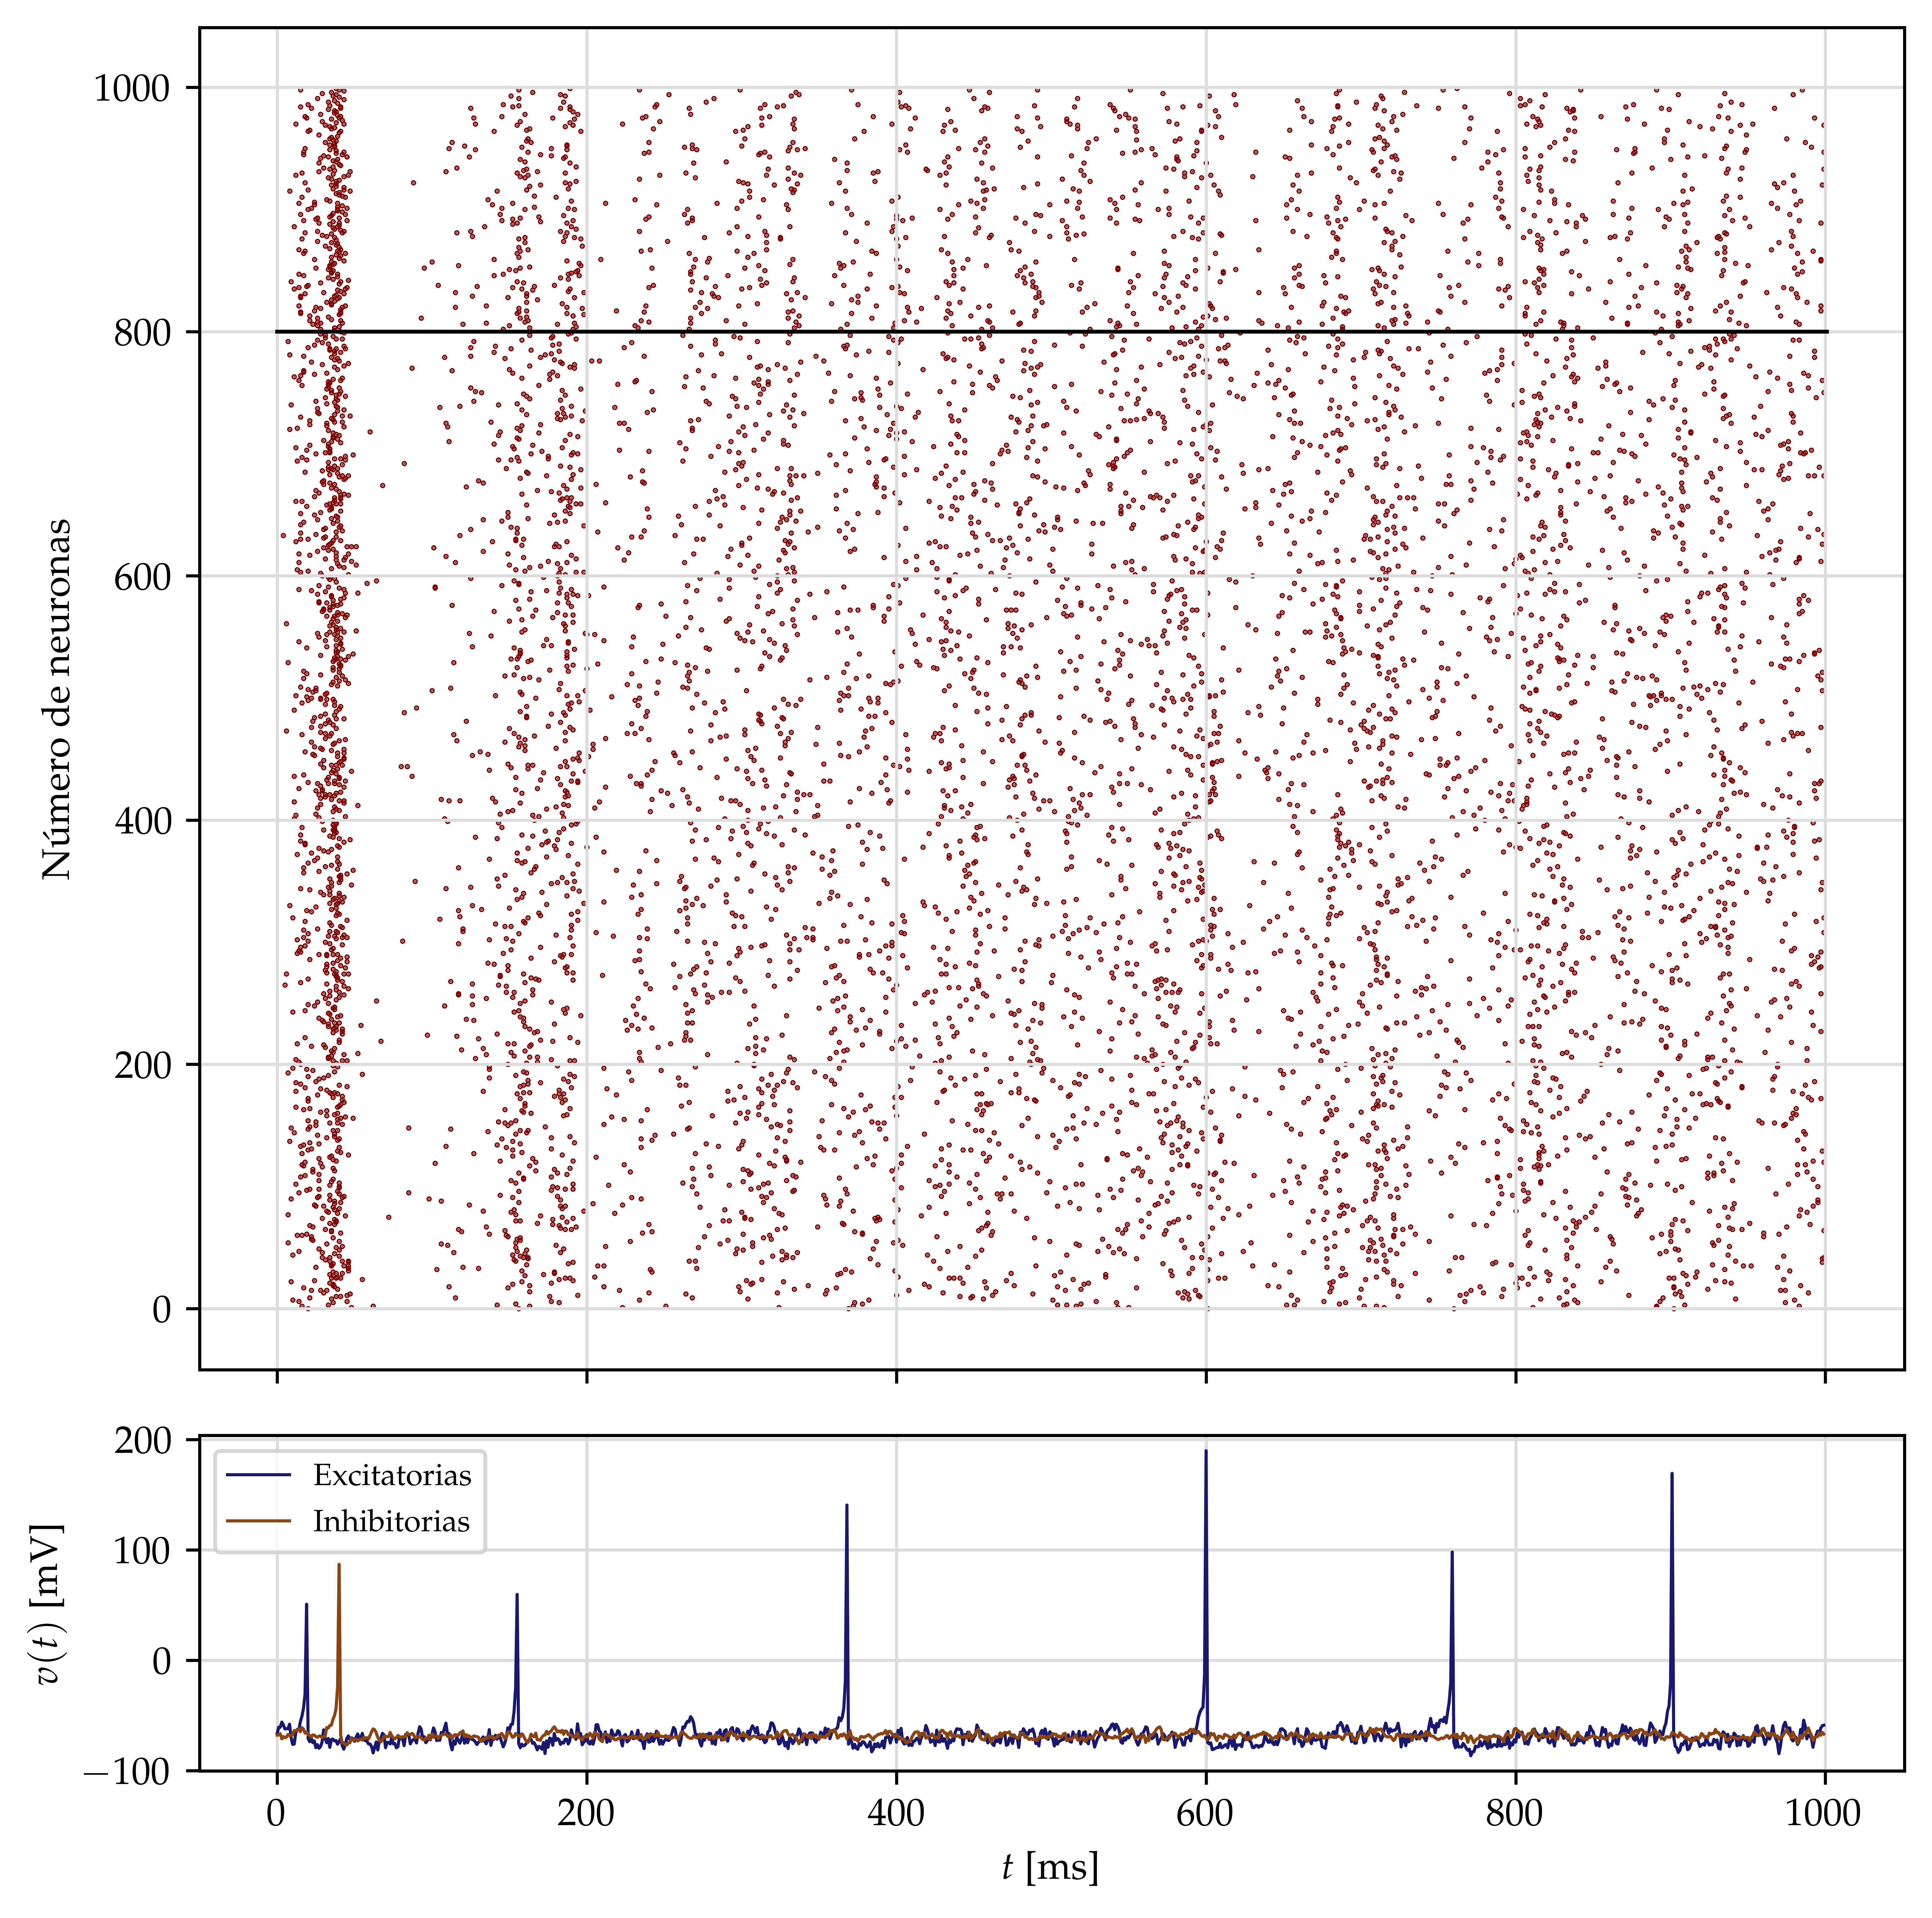

In [169]:
fig, axs = plt.subplots(2, 1, figsize=(7,7), sharex=True, gridspec_kw={"height_ratios": [4,1]})
plt.xlabel("$t$ [ms]")

xc=[0,1001]
yc=[800,800]

if len(firings)>1:
    firings=np.array(firings)
    axs[0].scatter(firings[:,0],firings[:,1],s=.135,color="maroon")
    axs[0].set_ylabel("Número de neuronas")
    axs[0].grid(color='gainsboro')
    axs[0].plot(xc,yc,linewidth=1,color="k")
else:
    print("ninguna neurona disparó")

axs[1].plot(list_t,list_ve,linewidth=0.8,label="Excitatorias",color="midnightblue")
axs[1].plot(list_t,list_vi,linewidth=0.8,label="Inhibitorias",color="saddlebrown")
axs[1].set_ylabel("$v(t)$ [mV]")
axs[1].grid(color='gainsboro')

plt.legend(loc="best", prop={'size': 8})

fig.tight_layout()
plt.savefig('figura-3.pdf', dpi=600, format='pdf')